In [1]:
import numpy as np
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17
import cv2 as cv
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, plot_confusion_matrix
import os
import pandas as pd
import random
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator # used for finding the optimal value of k

np.random.seed(22)

     |████████████████████████████████| 25.0MB 170kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 175kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import os
flowers = ['Daisy', 'Rose', 'Sunflower', 'Tulip']
path = '/content/drive/My Drive/2D Geometric Shapes Recognition System/Flowers/'
training_file_names = []
training_flower_labels = []
for i in range(0, len(flowers)):
    sub_path = path + 'Train/' + flowers[i] + '/'
    sub_file_names = [os.path.join(sub_path, f) for f in os.listdir(sub_path)]
    sub_flower_labels = [i] * len(sub_file_names) #create a list of N elements, all are i
    training_file_names += sub_file_names
    training_flower_labels += sub_flower_labels

print(len(training_file_names))
print(len(training_flower_labels))

160
160


In [ ]:
# code to find optimal value of k
'''training_data = []

sift = cv.xfeatures2d.SIFT_create()
num_keypoints = [] #this is used to store the number of keypoints in each image
#load training images and compute SIFT descriptors
for filename in training_file_names:
    img = cv.imread(filename)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    list_des = sift.detectAndCompute(img_gray, None)[1]
    if list_des is None:
        num_keypoints.append(0)
    else:
        num_keypoints.append(len(list_des))
        for des in list_des:
            training_data.append(des)

def kmeans_method(training_data):
  ssd = []
  K = []
  val = [i for i in range(10,101,5)]
  for k in val:
    kmeans = KMeans(k)
    kmeans.fit(training_data)
    K.append(k)
    ssd.append(kmeans.inertia_)

  # plot
  plt.figure(figsize=(15,7))
  plt.plot(K, ssd, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Sum_of_squared_distances')
  plt.title('Elbow Method For Optimal k')
  plt.show()

  # find optimal value of k
  k = KneeLocator(range(10,101, 5), ssd, curve='convex', direction='decreasing')
  print(f'Optimal value of k is {k.elbow}.')    

  return k.elbow # retuns optimal k vlaue

kmeans_method(training_data)'''

"training_data = []\n\nsift = cv.xfeatures2d.SIFT_create()\nnum_keypoints = [] #this is used to store the number of keypoints in each image\n#load training images and compute SIFT descriptors\nfor filename in training_file_names:\n    img = cv.imread(filename)\n    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)\n    list_des = sift.detectAndCompute(img_gray, None)[1]\n    if list_des is None:\n        num_keypoints.append(0)\n    else:\n        num_keypoints.append(len(list_des))\n        for des in list_des:\n            training_data.append(des)\n\ndef kmeans_method(training_data):\n  ssd = []\n  K = []\n  val = [i for i in range(10,101,5)]\n  for k in val:\n    kmeans = KMeans(k)\n    kmeans.fit(training_data)\n    K.append(k)\n    ssd.append(kmeans.inertia_)\n\n  # plot\n  plt.figure(figsize=(15,7))\n  plt.plot(K, ssd, 'bx-')\n  plt.xlabel('k')\n  plt.ylabel('Sum_of_squared_distances')\n  plt.title('Elbow Method For Optimal k')\n  plt.show()\n\n  # find optimal value of k\n  k = Kn

In [4]:
class Dictionary(object):
    def __init__(self, name, img_filenames):
        self.name = name #name of your dictionary
        self.img_filenames = img_filenames #list of image filenames
        #self.num_words = num_words #the number of words
        self.training_data = [] #this is the training data required by the K-Means algorithm
        self.words = [] #list of words, which are the centroids of clusters

    def learn(self):
        sift = cv.xfeatures2d.SIFT_create()
        num_keypoints = [] #this is used to store the number of keypoints in each image
        #load training images and compute SIFT descriptors
        for filename in self.img_filenames:
            img = cv.imread(filename)
            img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            list_des = sift.detectAndCompute(img_gray, None)[1]
            if list_des is None:
                num_keypoints.append(0)
            else:
                num_keypoints.append(len(list_des))
                for des in list_des:
                    self.training_data.append(des)
        #cluster SIFT descriptors using K-means algorithm
        self.num_words = 40 #optimal value
        kmeans = KMeans(self.num_words)
        kmeans.fit(self.training_data)
        self.words = kmeans.cluster_centers_
        #create word histograms for training images
        training_word_histograms = [] #list of word histograms of all training images
        index = 0
        for i in range(0, len(self.img_filenames)):
            #for each file, create a histogram
            histogram = np.zeros(self.num_words, np.float32)
            #if some keypoints exist
            if num_keypoints[i] > 0:
                for j in range(0, num_keypoints[i]):
                    histogram[kmeans.labels_[j + index]] += 1
                index += num_keypoints[i]
                histogram /= num_keypoints[i]
                training_word_histograms.append(histogram)
        return training_word_histograms
        
    def create_word_histograms(self, img_filenames):
        sift = cv.xfeatures2d.SIFT_create()
        histograms = []
        for filename in img_filenames:
            img = cv.imread(filename)
            img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            descriptors = sift.detectAndCompute(img_gray, None)[1]
            histogram = np.zeros(self.num_words, np.float32) #word histogram for the input image
            if descriptors is not None:
                for des in descriptors:
                    #find the best matching word
                    min_distance = 1111111 #this can be any large number
                    matching_word_ID = -1 #initial matching_word_ID=-1 means no matching
                    for i in range(0, self.num_words): #search for the best matching word
                        distance = np.linalg.norm(des - self.words[i])
                        if distance < min_distance:
                            min_distance = distance
                            matching_word_ID = i
                    histogram[matching_word_ID] += 1
                histogram /= len(descriptors) #normalise histogram to frequencies
            histograms.append(histogram)
        return histograms

In [5]:
#num_words = 50
dictionary_name = 'flower'
dictionary = Dictionary(dictionary_name, training_file_names)

In [6]:
training_word_histograms = dictionary.learn()

In [7]:
len(training_word_histograms)

160

In [8]:
import pickle
#save dictionary
with open(os.path.join(path,'flower_dictionary.dic'), 'wb') as f: #'wb' is for binary write
 pickle.dump(dictionary, f)

In [48]:
import pickle 
with open(os.path.join(path,'flower_dictionary.dic'), 'rb') as f: #'rb' is for binary read
  dictionary = pickle.load(f)

In [49]:
# store values for plotting
n_neighbours = []
n_accuracy = []
def knn_classifier(n):
  num_nearest_neighbours = n #number of neighbours
  knn = KNeighborsClassifier(n_neighbors = num_nearest_neighbours)
  knn.fit(training_word_histograms, training_flower_labels)
  # test all images
  validation_file_names = []
  validation_flower_labels = []
  for i in range(0, len(flowers)):
      sub_path = path + 'Validation/' + flowers[i] + '/'
      sub_file_names = [os.path.join(sub_path, f) for f in os.listdir(sub_path)]
      sub_flower_labels = [i] * len(sub_file_names) #create a list of N elements, all are i
      validation_file_names += sub_file_names
      validation_flower_labels += sub_flower_labels
  
  word_histograms = dictionary.create_word_histograms(validation_file_names)
  predicted_flower_labels = knn.predict(word_histograms)

  print(f'When No. of Nearest Neighbours (K) is {n}')
  accuracy = accuracy_score(validation_flower_labels, predicted_flower_labels)*100
  n_neighbours.append(n) # will be used for plotting
  n_accuracy.append(accuracy) # will be used for plotting
  print(f'Accuracy score is {accuracy:.2f}%')
  cm = confusion_matrix(validation_flower_labels, predicted_flower_labels)
  recognisation_accuracy = (cm[0][0] + cm[1][1] + cm[2][2])
  print(f'Recognition accuracy is {recognisation_accuracy}/{len(validation_file_names)}')
  print(f'Confusion Matrix:\n{cm}')
  print(plot_confusion_matrix(knn, word_histograms, validation_flower_labels, display_labels=flowers))
  plt.title(f'{n}-NN Classifier')
  print(f'Classification Report:\n{classification_report(validation_flower_labels, predicted_flower_labels)}')
  return f'Success when N={n}'

KNN Classifier
When No. of Nearest Neighbours (K) is 10
Accuracy score is 56.67%
Recognition accuracy is 55/120
Confusion Matrix:
[[14  8  6  2]
 [ 2 25  1  2]
 [ 3  7 16  4]
 [ 3 12  2 13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.47      0.54        30
           1       0.48      0.83      0.61        30
           2       0.64      0.53      0.58        30
           3       0.62      0.43      0.51        30

    accuracy                           0.57       120
   macro avg       0.59      0.57      0.56       120
weighted avg       0.59      0.57      0.56       120

10-NN completed!
When No. of Nearest Neighbours (K) is 15
Accuracy score is 56.67%
Recognition accuracy is 55/120
Confusion Matrix:
[[11 10  6  3]
 [ 1 28  0  1]
 [ 3  8 16  3]
 [ 2 13  2 13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.37      0.47        30
           1       0.47   

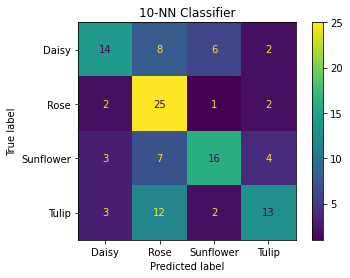

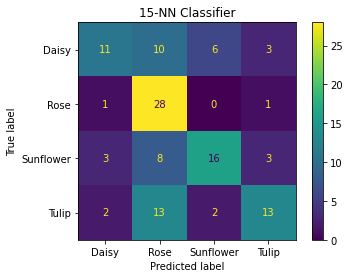

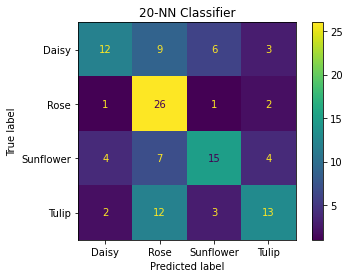

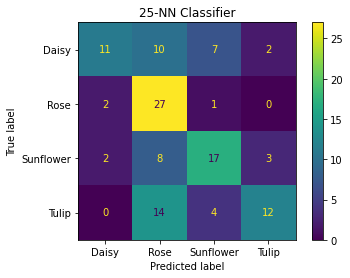

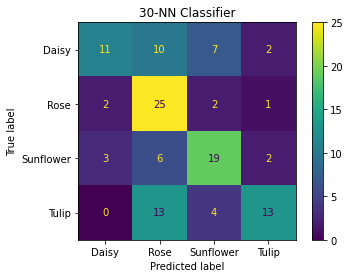

In [50]:
print('KNN Classifier')
n =  [10, 15, 20, 25, 30]  #nearest neighbours
for k in n:
  knn_classifier(k)
  print(f'{k}-NN completed!')

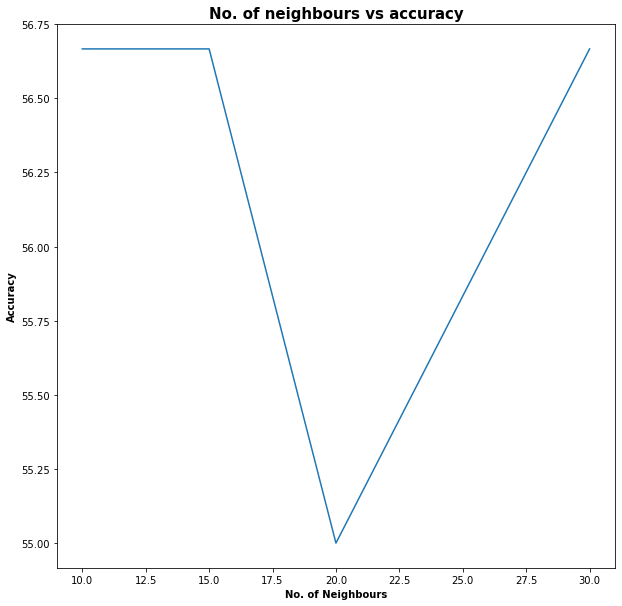

In [51]:
# plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot([int(i) for i in n_neighbours], n_accuracy)
plt.title('No. of neighbours vs accuracy', fontsize=15, fontweight='bold')
plt.xlabel('No. of Neighbours', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.show()

In [52]:
# store all test classifier accuracies for plotting
classifier_accuracy = [] # format (classifier_name, accuracy)

When No. of Nearest Neighbours (K) is 10
Accuracy score is 42.86%
Recognition accuracy is 37/119
Confusion Matrix:
[[ 7 17  3  3]
 [ 1 21  1  7]
 [ 1 11  9  8]
 [ 0 15  1 14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.23      0.36        30
           1       0.33      0.70      0.45        30
           2       0.64      0.31      0.42        29
           3       0.44      0.47      0.45        30

    accuracy                           0.43       119
   macro avg       0.55      0.43      0.42       119
weighted avg       0.55      0.43      0.42       119



'Success when N=10'

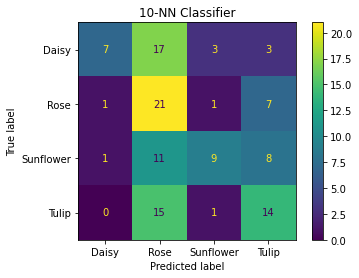

In [53]:
''' For test set '''
# dynamically find best accuracy n value

values = zip(n_neighbours, n_accuracy)

def Sort_Tuple(tup):  
    return(sorted(tup, key = lambda x: x[1], reverse=True))   

neighbors = Sort_Tuple(values)[0][0]

def knn_classifier(n=neighbors):
    num_nearest_neighbours = n #number of neighbours
    knn = KNeighborsClassifier(n_neighbors = num_nearest_neighbours)
    knn.fit(training_word_histograms, training_flower_labels)

    # test all images
    test_file_names = []
    test_flower_labels = []
    for i in range(0, len(flowers)):
        sub_path = path + 'Test/' + flowers[i] + '/'
        sub_file_names = [os.path.join(sub_path, f) for f in os.listdir(sub_path)]
        sub_flower_labels = [i] * len(sub_file_names) #create a list of N elements, all are i
        test_file_names += sub_file_names
        test_flower_labels += sub_flower_labels
    
    word_histograms = dictionary.create_word_histograms(test_file_names)
    predicted_flower_labels = knn.predict(word_histograms)

    print(f'When No. of Nearest Neighbours (K) is {n}')
    accuracy = accuracy_score(test_flower_labels, predicted_flower_labels)*100
    classifier_accuracy.append(('KNN', accuracy))
    print(f'Accuracy score is {accuracy:.2f}%')
    cm = confusion_matrix(test_flower_labels, predicted_flower_labels)
    recognisation_accuracy = (cm[0][0] + cm[1][1] + cm[2][2])
    print(f'Recognition accuracy is {recognisation_accuracy}/{len(test_file_names)}')
    print(f'Confusion Matrix:\n{cm}')
    print(plot_confusion_matrix(knn, word_histograms, test_flower_labels, display_labels=flowers))
    plt.title(f'{n}-NN Classifier')
    print(f'Classification Report:\n{classification_report(test_flower_labels, predicted_flower_labels)}')
    return f'Success when N={n}'
  
knn_classifier()

In [54]:
# store values for plotting
c_values = []
svm_accuracy = []

def svm_classifier(c):
    svm_classifier = SVC(C = c, kernel = 'linear')
    svm_classifier.fit(training_word_histograms, training_flower_labels)

    # validtion on all images
    val_file_names = []
    val_flower_labels = []
    for i in range(0, len(flowers)):
        sub_path = path + 'Validation/' + flowers[i] + '/'
        sub_file_names = [os.path.join(sub_path, f) for f in os.listdir(sub_path)]
        sub_flower_labels = [i] * len(sub_file_names) #create a list of N elements, all are i
        val_file_names += sub_file_names
        val_flower_labels += sub_flower_labels
    
    word_histograms = dictionary.create_word_histograms(val_file_names)
    predicted_flower_labels = svm_classifier.predict(word_histograms)

    print(f'When C value (C) is {c}')
    accuracy = accuracy_score(val_flower_labels, predicted_flower_labels)*100
    c_values.append(c) # will be used for plotting
    svm_accuracy.append(accuracy) # will be used for plotting
    print(f'Accuracy score is {accuracy:.2f}%')
    cm = confusion_matrix(val_flower_labels, predicted_flower_labels)
    recognisation_accuracy = (cm[0][0] + cm[1][1] + cm[2][2])
    print(f'Recognition accuracy is {recognisation_accuracy}/{len(val_file_names)}')
    print(f'Confusion Matrix:\n{cm}')
    print(plot_confusion_matrix(svm_classifier, word_histograms, val_flower_labels, display_labels=flowers))
    plt.title(f'C = {c}')
    print(f'Classification Report:\n{classification_report(val_flower_labels, predicted_flower_labels)}')
    return f'Success when C={c}'

When C value (C) is 10
Accuracy score is 58.33%
Recognition accuracy is 50/120
Confusion Matrix:
[[13  5  6  6]
 [ 1 20  1  8]
 [ 5  1 17  7]
 [ 0  5  5 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.43      0.53        30
           1       0.65      0.67      0.66        30
           2       0.59      0.57      0.58        30
           3       0.49      0.67      0.56        30

    accuracy                           0.58       120
   macro avg       0.60      0.58      0.58       120
weighted avg       0.60      0.58      0.58       120

When C value (C) is 20
Accuracy score is 59.17%
Recognition accuracy is 53/120
Confusion Matrix:
[[13  7  6  4]
 [ 2 22  1  5]
 [ 5  1 18  6]
 [ 2  6  4 18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.43      0.50        30
           1       0.61      0.73      0.67        30
           2       0.62      0.60      0

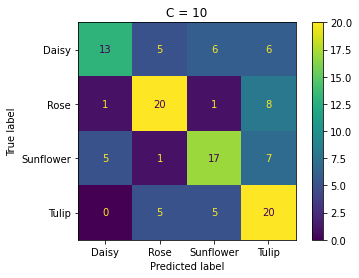

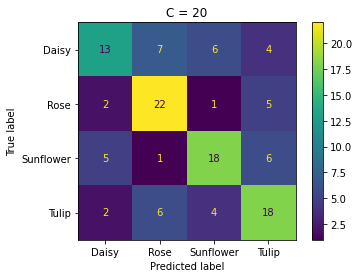

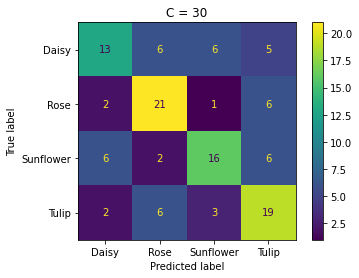

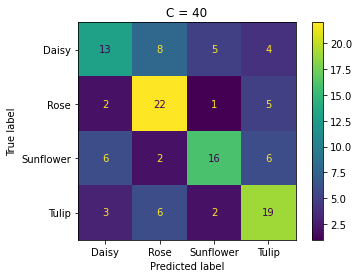

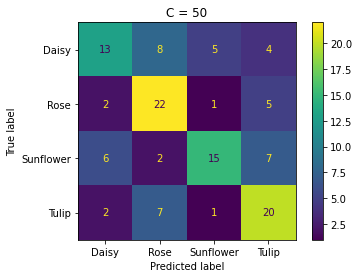

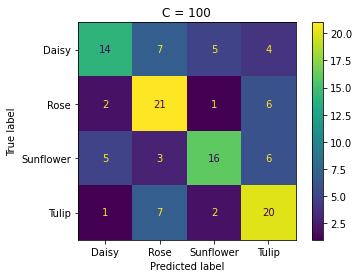

In [55]:
c = [10, 20, 30, 40, 50, 100]  # values
for c_value in c:
    svm_classifier(c_value)

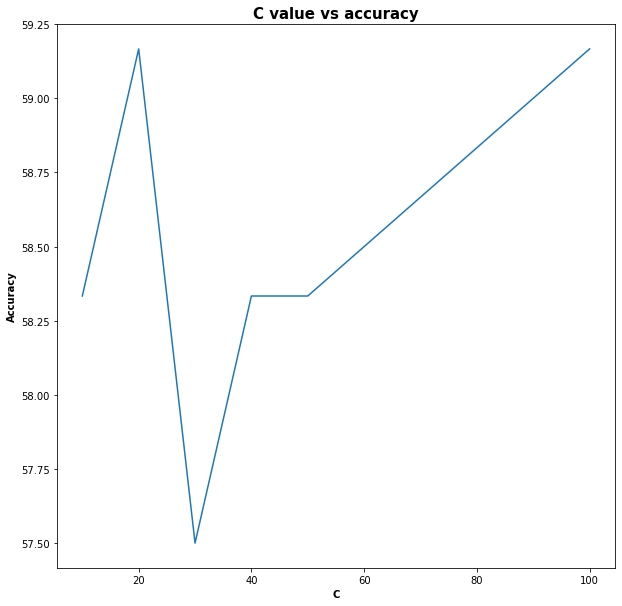

In [56]:
# plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot([int(i) for i in c_values], svm_accuracy)
plt.title('C value vs accuracy', fontsize=15, fontweight='bold')
plt.xlabel('C', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.show()

When C value (C) is 20
Accuracy score is 46.22%
Recognition accuracy is 39/119
Confusion Matrix:
[[10  7  3 10]
 [ 0 16  2 12]
 [ 3  2 13 11]
 [ 3 10  1 16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.33      0.43        30
           1       0.46      0.53      0.49        30
           2       0.68      0.45      0.54        29
           3       0.33      0.53      0.41        30

    accuracy                           0.46       119
   macro avg       0.52      0.46      0.47       119
weighted avg       0.52      0.46      0.47       119



'Success when C=20'

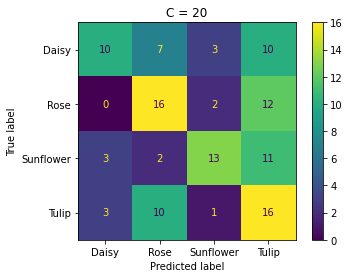

In [57]:
# for test set
values = zip(c_values, svm_accuracy)

def Sort_Tuple(tup):  
    return(sorted(tup, key = lambda x: x[1], reverse=True))   

c_value = Sort_Tuple(values)[0][0]


def svm_classifier(c=c_value):
    svm_classifier = SVC(C = c, kernel = 'linear')
    svm_classifier.fit(training_word_histograms, training_flower_labels)

    # test all images
    test_file_names = []
    test_flower_labels = []
    for i in range(0, len(flowers)):
        sub_path = path + 'Test/' + flowers[i] + '/'
        sub_file_names = [os.path.join(sub_path, f) for f in os.listdir(sub_path)]
        sub_flower_labels = [i] * len(sub_file_names) #create a list of N elements, all are i
        test_file_names += sub_file_names
        test_flower_labels += sub_flower_labels
    
    word_histograms = dictionary.create_word_histograms(test_file_names)
    predicted_flower_labels = svm_classifier.predict(word_histograms)

    print(f'When C value (C) is {c}')
    accuracy = accuracy_score(test_flower_labels, predicted_flower_labels)*100
    classifier_accuracy.append(('SVM', accuracy))
    print(f'Accuracy score is {accuracy:.2f}%')
    cm = confusion_matrix(test_flower_labels, predicted_flower_labels)
    recognisation_accuracy = (cm[0][0] + cm[1][1] + cm[2][2])
    print(f'Recognition accuracy is {recognisation_accuracy}/{len(test_file_names)}')
    print(f'Confusion Matrix:\n{cm}')
    print(plot_confusion_matrix(svm_classifier, word_histograms, test_flower_labels, display_labels=flowers))
    plt.title(f'C = {c}')
    print(f'Classification Report:\n{classification_report(test_flower_labels, predicted_flower_labels)}')
    return f'Success when C={c}'

svm_classifier()

In [58]:
'''Adaboost'''

# store values for plotting
n_values= []
ada_accuracy = []

def adaboost_classifier(n_estimator):
    adb_classifier = AdaBoostClassifier(n_estimators = n_estimator, random_state = 0)
    adb_classifier.fit(training_word_histograms, training_flower_labels)

    # test all images
    val_file_names = []
    val_flower_labels = []
    for i in range(0, len(flowers)):
        sub_path = path + 'Validation/' + flowers[i] + '/'
        sub_file_names = [os.path.join(sub_path, f) for f in os.listdir(sub_path)]
        sub_flower_labels = [i] * len(sub_file_names) #create a list of N elements, all are i
        val_file_names += sub_file_names
        val_flower_labels += sub_flower_labels
    
    word_histograms = dictionary.create_word_histograms(val_file_names)
    predicted_flower_labels = adb_classifier.predict(word_histograms)

    print(f'When n_estimators is {n_estimator}')
    accuracy = accuracy_score(val_flower_labels, predicted_flower_labels)*100
    n_values.append(n_estimator) # will be used for plotting
    ada_accuracy.append(accuracy) # will be used for plotting
    print(f'Accuracy score is {accuracy:.2f}%')
    cm = confusion_matrix(val_flower_labels, predicted_flower_labels)
    recognisation_accuracy = (cm[0][0] + cm[1][1] + cm[2][2])
    print(f'Recognition accuracy is {recognisation_accuracy}/{len(val_file_names)}')
    print(f'Confusion Matrix:\n{cm}')
    print(plot_confusion_matrix(adb_classifier, word_histograms, val_flower_labels, display_labels=flowers))
    plt.title(f'n_estimators = {n_estimator}')
    print(f'Classification Report:\n{classification_report(val_flower_labels, predicted_flower_labels)}')
    return f'Success when n_estimetors={n_estimator}'

When n_estimators is 50
Accuracy score is 40.00%
Recognition accuracy is 32/120
Confusion Matrix:
[[ 8  6  5 11]
 [ 4 18  3  5]
 [ 4  6  6 14]
 [ 4  6  4 16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.27      0.32        30
           1       0.50      0.60      0.55        30
           2       0.33      0.20      0.25        30
           3       0.35      0.53      0.42        30

    accuracy                           0.40       120
   macro avg       0.40      0.40      0.38       120
weighted avg       0.40      0.40      0.38       120

When n_estimators is 100
Accuracy score is 43.33%
Recognition accuracy is 42/120
Confusion Matrix:
[[12  5  6  7]
 [ 3 19  2  6]
 [ 4  9 11  6]
 [ 4 12  4 10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.40      0.45        30
           1       0.42      0.63      0.51        30
           2       0.48      0.37    

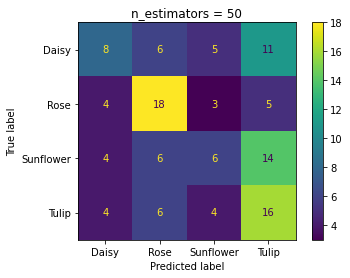

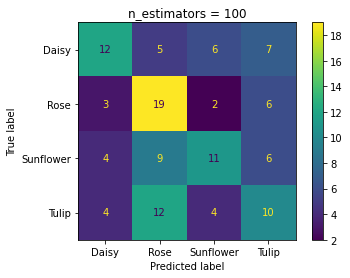

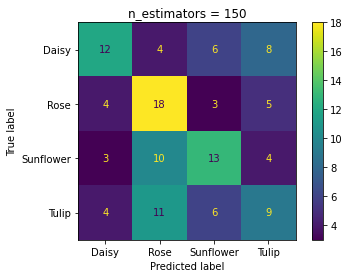

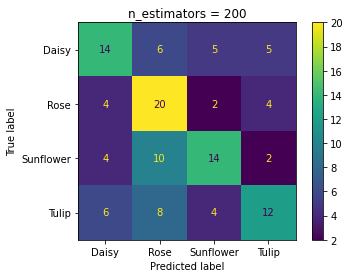

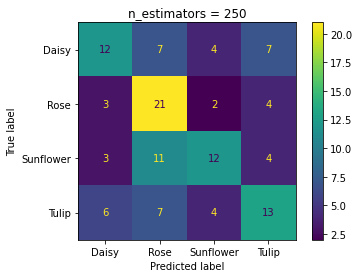

In [59]:
n_estimators = [50, 100, 150, 200, 250]  # values
for n_estimator in n_estimators:
    adaboost_classifier(n_estimator)

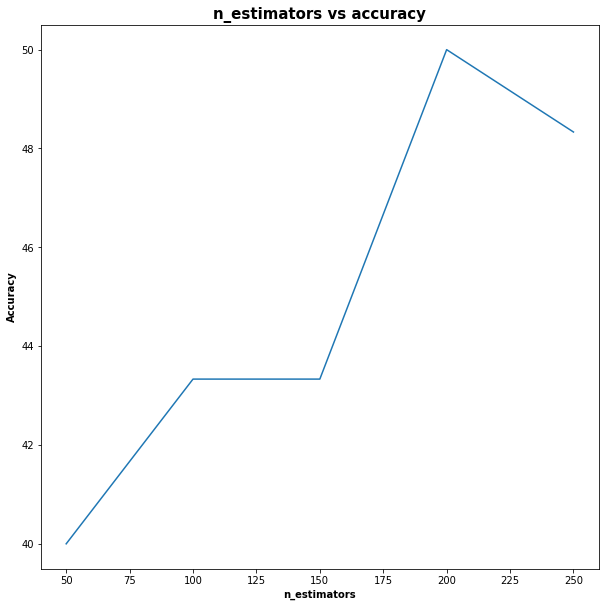

In [60]:
# plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot([int(i) for i in n_values], ada_accuracy)
plt.title('n_estimators vs accuracy', fontsize=15, fontweight='bold')
plt.xlabel('n_estimators', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.show()

When n_estimators is 200
Accuracy score is 33.61%
Recognition accuracy is 32/119
Confusion Matrix:
[[ 7 12  5  6]
 [ 4 15  3  8]
 [ 4 10 10  5]
 [ 3 18  1  8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.23      0.29        30
           1       0.27      0.50      0.35        30
           2       0.53      0.34      0.42        29
           3       0.30      0.27      0.28        30

    accuracy                           0.34       119
   macro avg       0.37      0.34      0.34       119
weighted avg       0.37      0.34      0.33       119



'Success when n_estimetors=200'

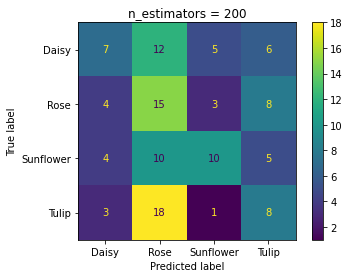

In [61]:
'''Test set only'''
# for test set
values = zip(n_values, ada_accuracy)

def Sort_Tuple(tup):  
    return(sorted(tup, key = lambda x: x[1], reverse=True))   

n_value = Sort_Tuple(values)[0][0]

def adaboost_classifier(n_estimator=n_value):
    adb_classifier = AdaBoostClassifier(n_estimators = n_estimator, random_state = 0)
    adb_classifier.fit(training_word_histograms, training_flower_labels)

    # test all images
    test_file_names = []
    test_flower_labels = []
    for i in range(0, len(flowers)):
        sub_path = path + 'Test/' + flowers[i] + '/'
        sub_file_names = [os.path.join(sub_path, f) for f in os.listdir(sub_path)]
        sub_flower_labels = [i] * len(sub_file_names) #create a list of N elements, all are i
        test_file_names += sub_file_names
        test_flower_labels += sub_flower_labels
    
    word_histograms = dictionary.create_word_histograms(test_file_names)
    predicted_flower_labels = adb_classifier.predict(word_histograms)

    print(f'When n_estimators is {n_estimator}')
    accuracy = accuracy_score(test_flower_labels, predicted_flower_labels)*100
    classifier_accuracy.append(('Adaboost', accuracy))
    print(f'Accuracy score is {accuracy:.2f}%')
    cm = confusion_matrix(test_flower_labels, predicted_flower_labels)
    recognisation_accuracy = (cm[0][0] + cm[1][1] + cm[2][2])
    print(f'Recognition accuracy is {recognisation_accuracy}/{len(test_file_names)}')
    print(f'Confusion Matrix:\n{cm}')
    print(plot_confusion_matrix(adb_classifier, word_histograms, test_flower_labels, display_labels=flowers))
    plt.title(f'n_estimators = {n_estimator}')
    print(f'Classification Report:\n{classification_report(test_flower_labels, predicted_flower_labels)}')
    return f'Success when n_estimetors={n_estimator}'

adaboost_classifier()

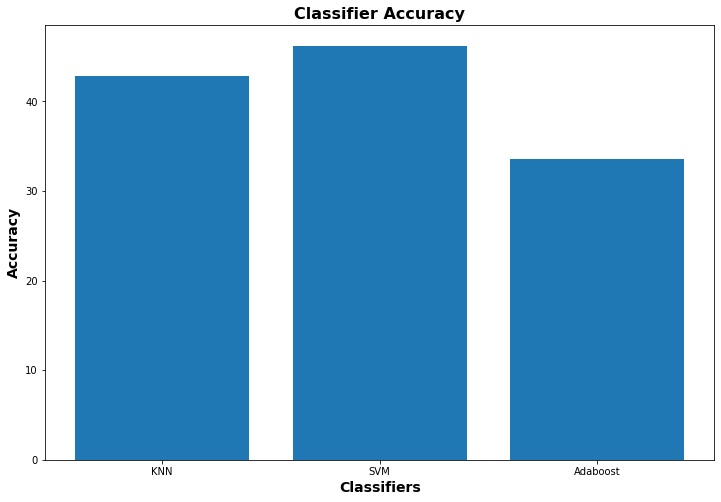

In [62]:
# plot all accuracy -- this is accuracy only 
plt.figure(figsize=(12,8))
plt.bar([i[0] for i in classifier_accuracy], [i[1] for i in classifier_accuracy])
plt.title('Classifier Accuracy', fontweight='bold', fontsize=16)
plt.xlabel('Classifiers', fontweight='bold', fontsize=14)
plt.ylabel('Accuracy', fontweight='bold', fontsize=14)
plt.xlim()
plt.show()